## 問題設定
日本の各都道府県には、東京のように店舗数やそこに揃えられている商品数が多く、食料の選択肢が多い県とそうでない県がある。
そこで世帯人員が増えることによる食生活の変化がどの程度であるかを検証したい。
つまり、日本の各都道府県の肉類の消費量を各都道府県の世帯人員によって説明したい。

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
df = pd.read_csv('C:/Users/koyama/OneDrive/応用統計1/SSDSE-C-2022 aaa.csv',encoding='shift-jis')
df.head()

,都道府県,世帯人員,肉類
0,全国,2.95,95071
1,北海道,2.84,90249
2,青森県,2.87,86377
3,岩手県,3.12,78536
4,宮城県,3.00,87201


In [8]:
y = df["肉類"]
x = df['世帯人員']

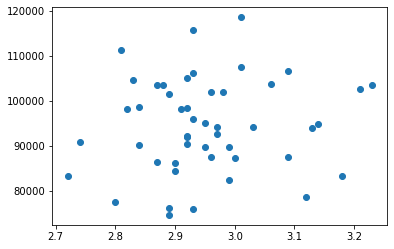

In [9]:
plt.scatter(x,y)

散布図において一貫性がなく、相関がないように思われる。

In [10]:
p_s = 0.05

In [11]:
r, p = pearsonr(x,y)

In [12]:
r

0.10266622001750653

In [13]:
p

0.48744318782606866

In [14]:
if p < p_s:
    print(f"肉類と世帯人員 には相関があり、相関係数は{ｒ}であった。")
elif p >= p_s:
    print(f"世帯人員と肉類には相関がない可能性を排除できなかった。")

世帯人員と肉類には相関がない可能性を排除できなかった。


(0.0, 120000.0)

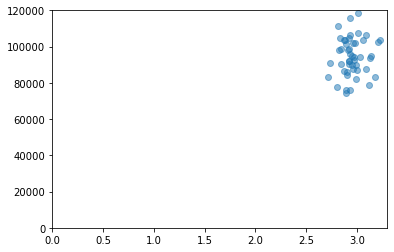

In [15]:
plt.scatter(x,y,alpha=0.5)
plt.xlim(xmin = 0,xmax=3.3)
plt.ylim(ymin = 0,ymax=120000)

In [16]:
deta_0 = 65000
deta_1 =10000

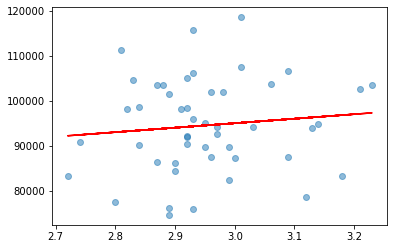

In [17]:
y_est = deta_0 + deta_1 * x
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [18]:
resid = y_est -y

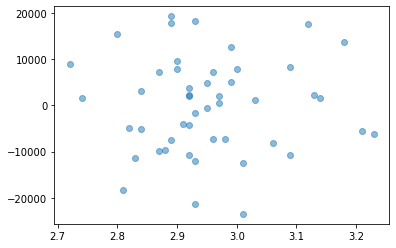

In [19]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [20]:
np.sum(resid**2)

5079903393.0

In [21]:
log = {
    "切片":[2.6,50000,],
    "傾き":[3,10000,10000],
    "誤差2乗和":[433797320011.0594,
                 15856233393.0,
                 5079903393.0]
}

In [22]:
import statsmodels.api as sm


In [23]:
X = sm.add_constant(x)


In [24]:
model =sm.OLS(y,X)

In [25]:
res = model.fit()

In [30]:
deta0_est,deta1_est = res.params
print(deta0_est,deta1_est)

66567.21541867254 9463.698743500194


In [27]:
y_est = deta0_est + deta1_est*x

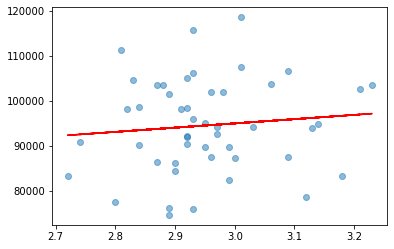

In [28]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_est,c="r")
plt.show()

In [29]:
resid =y_est -y

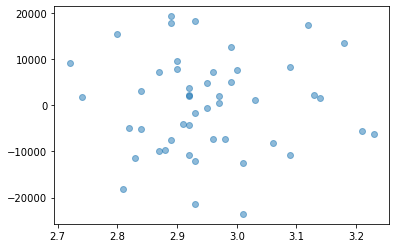

In [31]:
plt.scatter(x,resid,alpha=0.5)
plt.show()

In [32]:
np.sum(resid**2)

5079716646.786735

In [33]:
log

{'切片': [2.6, 50000],
 '傾き': [3, 10000, 10000],
 '誤差2乗和': [433797320011.0594, 15856233393.0, 5079903393.0]}